In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso


In [3]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=42)
print(X_test.shape, y_test.shape)

(152, 13) (152,)


In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [6]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [7]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [8]:
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

ridge_train_score = rr.score(X_train, y_train)
ridge_test_score = rr.score(X_test, y_test)


ridge100_train_score = rr100.score(X_train, y_train)
ridge100_test_score = rr100.score(X_test, y_test)


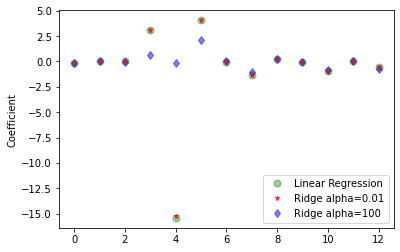

In [14]:
plt.plot(lr.coef_, alpha=0.4, linestyle='none', marker='o', markersize=7, color='green', label='Linear Regression')
plt.plot(rr.coef_, alpha=0.7, linestyle='none', marker='*', markersize=5, color='red', label='Ridge alpha=0.01', zorder=7)
plt.plot(rr100.coef_, alpha=0.5, linestyle='none', marker='d', markersize=6, color='blue', label='Ridge alpha=100')
plt.ylabel('Coefficient')
plt.legend(loc=4)
plt.show()

In [16]:
ls = Lasso()
ls.fit(X_train, y_train)

ls001 = Lasso(alpha=0.01, max_iter=10000)
ls001.fit(X_train, y_train)


Lasso(alpha=0.01, max_iter=10000)

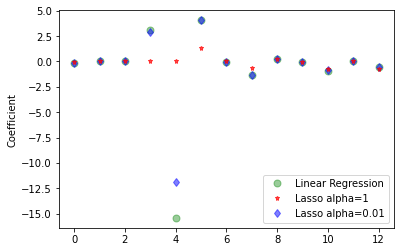

In [17]:
plt.plot(lr.coef_, alpha=0.4, linestyle='none', marker='o', markersize=7, color='green', label='Linear Regression')
plt.plot(ls.coef_, alpha=0.7, linestyle='none', marker='*', markersize=5, color='red', label='Lasso alpha=1', zorder=7)
plt.plot(ls001.coef_, alpha=0.5, linestyle='none', marker='d', markersize=6, color='blue', label='Lasso alpha=0.01')
plt.ylabel('Coefficient')
plt.legend(loc=4)
plt.show()

In [18]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic = titanic_df['Survived']
X_titanic = titanic_df.drop('Survived', axis=1)

In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
X_titanic.drop('Cabin', axis=1, inplace=True)

In [24]:
X_titanic['Sex'] = X_titanic['Sex'].apply(lambda x : 1 if x == 'female' else 0)
X_titanic['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [25]:
y_titanic

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

In [37]:
from sklearn.base import BaseEstimator

class DummyClassifier (BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 1
            else:
                pred[i] = 0
                
        return pred

In [38]:
myclf = DummyClassifier()
myclf.fit(X_train, y_train)

pred = myclf.predict(X_test)

In [39]:
accuracy_score(y_test, pred)

0.7821229050279329

In [41]:
from sklearn.datasets import load_digits

class FakeClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def pred(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
digits = load_digits()


(64,)

In [42]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [43]:
digits.data.shape

(1797, 64)

In [44]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 432x288 with 0 Axes>

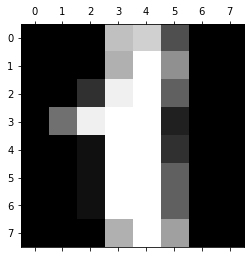

In [46]:
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [47]:
y = (digits.target == 7).astype(int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=42)

In [49]:
pd.Series(y_test).value_counts()

0    409
1     41
dtype: int64

In [50]:
fakeclf = FakeClassifier()
fakeclf.fit(X_train, y_train)
fake_pred = fakeclf.pred(X_test)
fake_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [51]:
accuracy_score(y_test, fake_pred)

0.9088888888888889

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fake_pred)

array([[409,   0],
       [ 41,   0]], dtype=int64)